# Presention File

##  Getting historical Data


In [50]:
import pandas as pd

ticker = 'JNJ'
file_path = f'../DataInputs/Weekly-Closing-Prices/{ticker}_Pricing/{ticker}_weekly_close.json'

# Load JSON data from file
df = pd.read_json(file_path, orient='index').rename(columns={0: 'Close'})
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)


##  Getting predictions

In [51]:
import json

def load_predictions(ticker, model_type, event):
    file_path = f'./{ticker}/{event}/{model_type}_prediction.json'
    with open(file_path, 'r') as file:
        predictions = json.load(file)
    return predictions

# Load ARIMA and LSTM predictions
arima_predictions = load_predictions(ticker, "ARIMA", "covid")
lstm_predictions = load_predictions(ticker, "LSTM", "covid")
LLM_predictions = load_predictions(ticker, "LLM", "covid")


## Graph

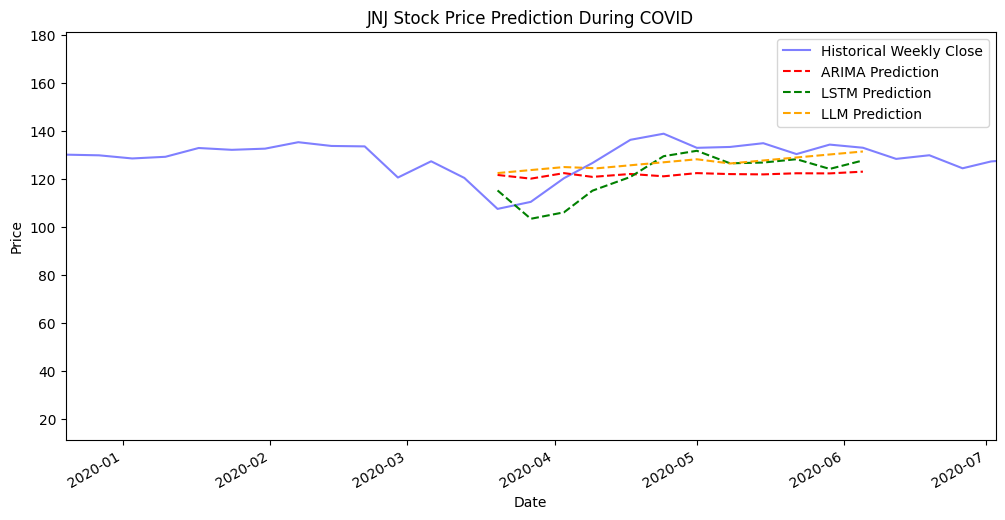

In [52]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming loading functions are already defined and executed

# Convert predictions to DataFrame for easy plotting
arima_pred_df = pd.DataFrame(list(arima_predictions.items()), columns=['Date', 'Prediction'])
arima_pred_df['Date'] = pd.to_datetime(arima_pred_df['Date'])
arima_pred_df.set_index('Date', inplace=True)

lstm_pred_df = pd.DataFrame(list(lstm_predictions.items()), columns=['Date', 'Prediction'])
lstm_pred_df['Date'] = pd.to_datetime(lstm_pred_df['Date'])
lstm_pred_df.set_index('Date', inplace=True)

LLM_pred_df = pd.DataFrame(list(LLM_predictions.items()), columns=['Date', 'Prediction'])
LLM_pred_df['Date'] = pd.to_datetime(LLM_pred_df['Date'])
LLM_pred_df.set_index('Date', inplace=True)

# Determine the earliest and latest prediction dates across both models
earliest_pred_date = min(arima_pred_df.index.min(), lstm_pred_df.index.min())
latest_pred_date = max(arima_pred_df.index.max(), lstm_pred_df.index.max())

# Set the window around the prediction period (3 months before, 4 weeks after)
window_start = earliest_pred_date - pd.DateOffset(months=3)
window_end = latest_pred_date + pd.DateOffset(weeks=4)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Weekly Close', color='blue', alpha=0.5)
plt.plot(arima_pred_df.index, arima_pred_df['Prediction'].astype(float), label='ARIMA Prediction', color='red', linestyle='--')
plt.plot(lstm_pred_df.index, lstm_pred_df['Prediction'].astype(float), label='LSTM Prediction', color='green', linestyle='--')
plt.plot(LLM_pred_df.index, LLM_pred_df['Prediction'].astype(float), label='LLM Prediction', color='orange', linestyle='--')


plt.title(f'{ticker} Stock Price Prediction During COVID')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xlim(window_start, window_end)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()


## Calculate RMSE and MAE for all predicitons

In [53]:
# Aligning the indices and calculating metrics only for the common dates
def align_and_calculate_metrics(actual_df, prediction_df):
    # Find the common dates
    common_dates = actual_df.index.intersection(prediction_df.index)
    
    # Select the common dates in both actual and predicted data
    actual_aligned = actual_df.loc[common_dates]
    prediction_aligned = prediction_df.loc[common_dates]
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(actual_aligned, prediction_aligned.astype(float)))
    mae = mean_absolute_error(actual_aligned, prediction_aligned.astype(float))
    
    return rmse, mae

# Perform the alignment and metrics calculation for each prediction set
arima_rmse, arima_mae = align_and_calculate_metrics(df['Close'], arima_pred_df['Prediction'])
lstm_rmse, lstm_mae = align_and_calculate_metrics(df['Close'], lstm_pred_df['Prediction'])
llm_rmse, llm_mae = align_and_calculate_metrics(df['Close'], LLM_pred_df['Prediction'])

print(f"ARIMA RMSE: {arima_rmse}, ARIMA MAE: {arima_mae}")
print(f"LSTM RMSE: {lstm_rmse}, LSTM MAE: {lstm_mae}")
print(f"LLM RMSE: {llm_rmse}, LLM MAE: {llm_mae}")


ARIMA RMSE: 11.429023391631818, ARIMA MAE: 10.719088149511043
LSTM RMSE: 9.226730556833061, LSTM MAE: 8.259709655761718
LLM RMSE: 8.632321390143398, LLM MAE: 7.397954545454544


Processing event: covid


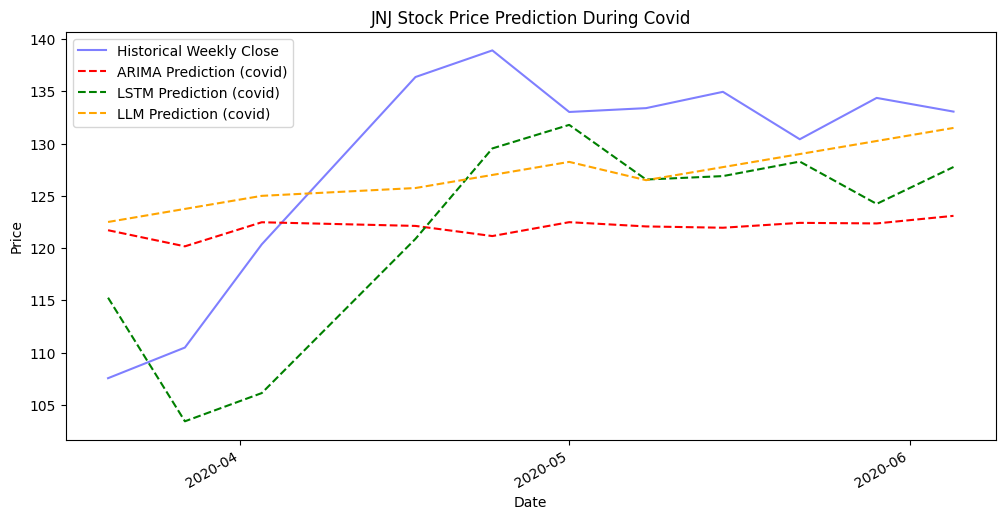

ARIMA - covid - Metrics: (11.809 / 11.167)
LSTM - covid - Metrics: (8.987 / 7.962)
LLM - covid - Metrics: (8.632 / 7.398)

Processing event: stable


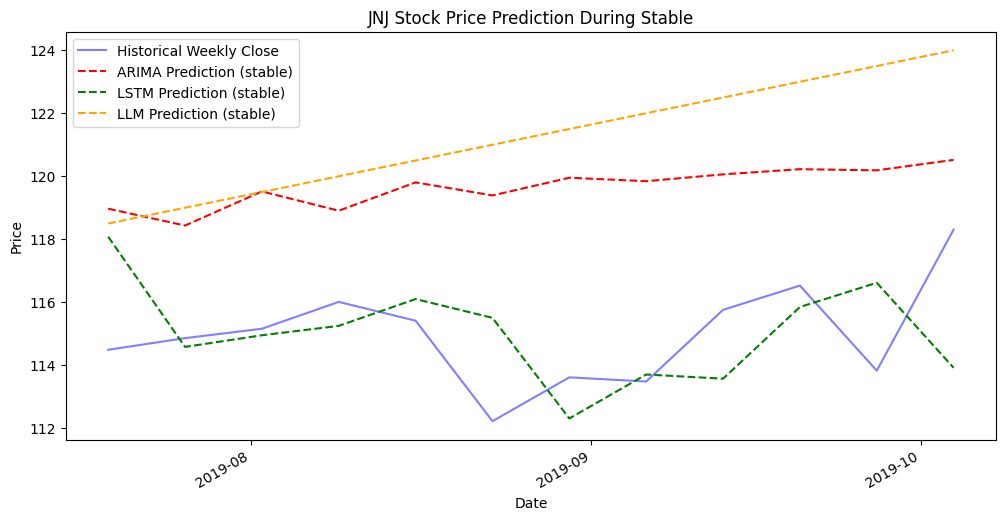

ARIMA - stable - Metrics: (4.907 / 4.678)
LSTM - stable - Metrics: (2.215 / 1.698)
LLM - stable - Metrics: (6.575 / 6.277)

Processing event: drop


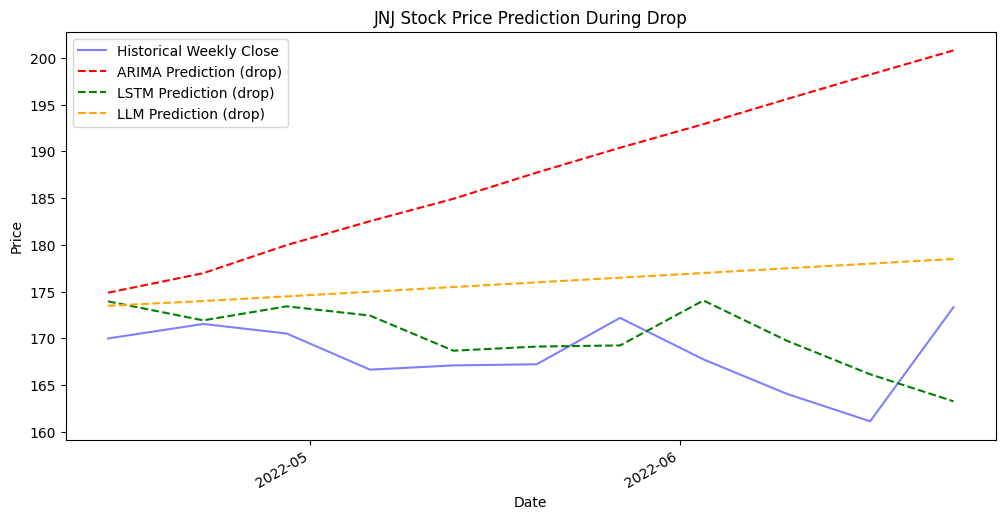

ARIMA - drop - Metrics: (21.775 / 19.392)
LSTM - drop - Metrics: (4.962 / 4.229)
LLM - drop - Metrics: (8.763 / 7.667)



In [54]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


def calculate_metrics(actual, predictions):
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)
    return f"({rmse:.3f} / {mae:.3f})"

# Loop through each event
events = ["covid", "stable", "drop"]
for event in events:
    print(f"Processing event: {event}")
    
    # Load predictions for ARIMA, LSTM, and LLM
    arima_predictions = load_predictions(ticker, "ARIMA", event)
    lstm_predictions = load_predictions(ticker, "LSTM", event)
    LLM_predictions = load_predictions(ticker, "LLM", event)
    
    # Convert predictions to DataFrames and align dates
    arima_pred_df = pd.DataFrame(list(arima_predictions.items()), columns=['Date', 'Prediction'])
    lstm_pred_df = pd.DataFrame(list(lstm_predictions.items()), columns=['Date', 'Prediction'])
    LLM_pred_df = pd.DataFrame(list(LLM_predictions.items()), columns=['Date', 'Prediction'])

    # Ensure that all indices are in datetime format
    arima_pred_df['Date'] = pd.to_datetime(arima_pred_df['Date'])
    lstm_pred_df['Date'] = pd.to_datetime(lstm_pred_df['Date'])
    LLM_pred_df['Date'] = pd.to_datetime(LLM_pred_df['Date'])
    arima_pred_df.set_index('Date', inplace=True)
    lstm_pred_df.set_index('Date', inplace=True)
    LLM_pred_df.set_index('Date', inplace=True)

    # Find common dates for actual prices and predictions
    common_dates = df.index.intersection(arima_pred_df.index).intersection(lstm_pred_df.index).intersection(LLM_pred_df.index)
    df_common = df.loc[common_dates]

    # Plot the actual and predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(df_common.index, df_common['Close'], label='Historical Weekly Close', color='blue', alpha=0.5)
    plt.plot(common_dates, arima_pred_df.loc[common_dates, 'Prediction'].astype(float), label=f'ARIMA Prediction ({event})', color='red', linestyle='--')
    plt.plot(common_dates, lstm_pred_df.loc[common_dates, 'Prediction'].astype(float), label=f'LSTM Prediction ({event})', color='green', linestyle='--')
    plt.plot(common_dates, LLM_pred_df.loc[common_dates, 'Prediction'].astype(float), label=f'LLM Prediction ({event})', color='orange', linestyle='--')

    plt.title(f'{ticker} Stock Price Prediction During {event.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    # plt.xlim(common_dates.min(), common_dates.max())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate date labels
    plt.show()
    
    # Calculate and print RMSE and MAE for ARIMA, LSTM, and LLM
    metrics_arima = calculate_metrics(df_common['Close'], arima_pred_df.loc[common_dates, 'Prediction'].astype(float))
    metrics_lstm = calculate_metrics(df_common['Close'], lstm_pred_df.loc[common_dates, 'Prediction'].astype(float))
    metrics_llm = calculate_metrics(df_common['Close'], LLM_pred_df.loc[common_dates, 'Prediction'].astype(float))
    
    print(f"ARIMA - {event} - Metrics: {metrics_arima}")
    print(f"LSTM - {event} - Metrics: {metrics_lstm}")
    print(f"LLM - {event} - Metrics: {metrics_llm}\n")
